In [1]:
from file_manager import load_system, select_atoms_by_Z, csv_export_atomic_system
from information_measures import *
import wave_function_constructor as wfc
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import numpy as np
BASE_PATH = "COEFS"

c:\Users\Ivan_lg\Desktop\Doctorado\Segundo_anio\TFG-Maria-del-Mar\Calculos\hartreeFock\information_measures.py:386: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  integrando = lambda r: - r**2(Rnl_monoparticular(r, orbitals, space, normalized)**2) * np.log((1/4*np.pi)*(Rnl_monoparticular(r, orbitals, space, True, normalized))**2) if Rnl_monoparticular(r, orbitals, space, True, normalized)**2 > 0 else 0


In [2]:
neutral_atom = load_system(0, BASE_PATH)

atoms_selected = select_atoms_by_Z(neutral_atom, 'all')
normalization = radial_normalization(atoms_selected, "momentum")
#shannonE = ShannonEntropy(atoms = atoms_selected, space="momentum")
#print(atoms_selected)
sum = 0
for orbital in atoms_selected[102].orbitals:
    sum +=orbital.mz
print(sum)

c:\Users\Ivan_lg\Desktop\Doctorado\Segundo_anio\TFG-Maria-del-Mar\Calculos\hartreeFock\information_measures.py:33: UserWarning: Space provided as string. Defaulting to same space for all atoms.
  warnings.warn("Space provided as string. Defaulting to same space for all atoms.", UserWarning)


103


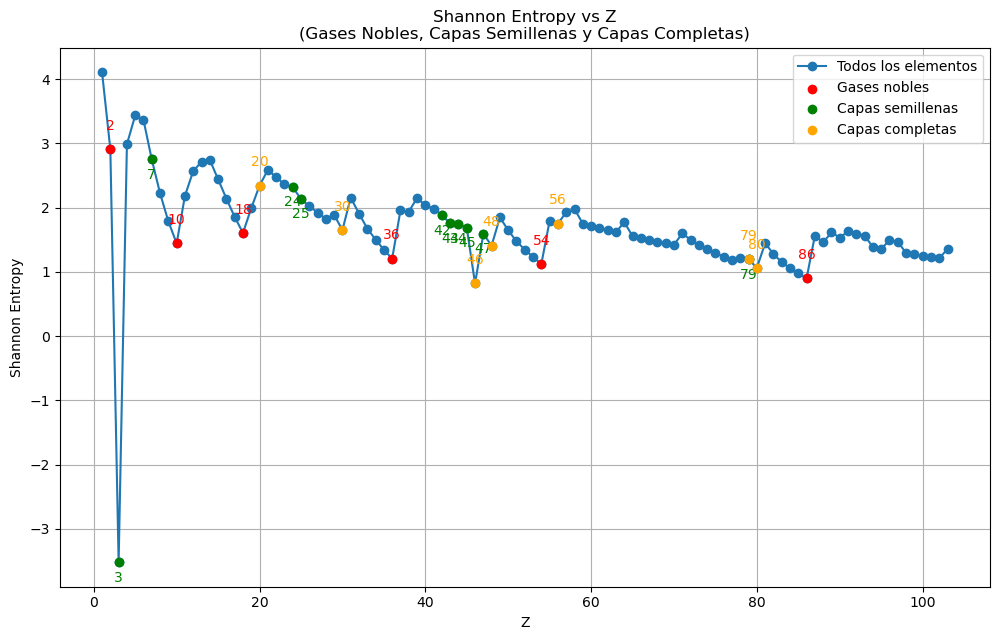

: 

In [ ]:

# Tus datos
datos = shannonE # <- tu lista completa


# Extraer listas de Z y ShannonEntropy
Z = [item['Z'] for item in datos]
ShannonEntropy = [item['ShannonEntropy'] for item in datos]

# Z de gases nobles
gases_nobles = [2, 10, 18, 36, 54, 86]

# Z de elementos con capas semillenas
capa_semillena = [3, 7, 24, 25, 42, 43, 44, 45, 47, 79]

# Z de elementos que completan capa
capa_completa = [20, 30,46, 48, 56, 79, 80]

# Extraer valores
Z_gases = [item['Z'] for item in datos if item['Z'] in gases_nobles]
Entropy_gases = [item['ShannonEntropy'] for item in datos if item['Z'] in gases_nobles]

Z_semillena = [item['Z'] for item in datos if item['Z'] in capa_semillena]
Entropy_semillena = [item['ShannonEntropy'] for item in datos if item['Z'] in capa_semillena]

Z_completa = [item['Z'] for item in datos if item['Z'] in capa_completa]
Entropy_completa = [item['ShannonEntropy'] for item in datos if item['Z'] in capa_completa]

# Gráfica principal
plt.figure(figsize=(12, 7))
plt.plot(Z, ShannonEntropy, marker='o', linestyle='-', label='Todos los elementos')

# Puntos especiales
plt.scatter(Z_gases, Entropy_gases, color='red', label='Gases nobles', zorder=5)
plt.scatter(Z_semillena, Entropy_semillena, color='green', label='Capas semillenas', zorder=5)
plt.scatter(Z_completa, Entropy_completa, color='orange', label='Capas completas', zorder=5)

# Etiquetas
for z, entropy in zip(Z_gases, Entropy_gases):
    plt.text(z, entropy + 0.3, f'{z}', ha='center', color='red')

for z, entropy in zip(Z_semillena, Entropy_semillena):
    plt.text(z, entropy - 0.3, f'{z}', ha='center', color='green')

for z, entropy in zip(Z_completa, Entropy_completa):
    plt.text(z, entropy + 0.3, f'{z}', ha='center', color='orange')

# Estética
plt.xlabel('Z')
plt.ylabel('Shannon Entropy')
plt.title('Shannon Entropy vs Z\n(Gases Nobles, Capas Semillenas y Capas Completas)')
plt.grid(True)
plt.legend()
plt.show()



In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import quad, simps

# Malla de puntos
r = np.linspace(1e-8, 100000, 10000000)  # Evitamos r=0 para no tener log(0)
t = r/(1+r)

# Evaluar la densidad (aquí deberías definir o importar wfc y atoms_selected antes)
# rho = wfc.rho_monoparticular(r, atoms_selected[0], "momentum")
# Para este ejemplo, supondré una gaussiana similar:
rho = rho_monoparticular(t, atoms_selected[0], "momentum", True, True)  # Cambia esto por tu función real

# Definir el integrando correctamente usando np.where
integrando = np.where(rho > 0, - 4 * np.pi * t**2 * rho * np.log(rho), 0)

# Función para usar en quad
def integrando2(r):
    t = r/(1+r)
    rho = rho_monoparticular(t, atoms_selected[0], "momentum", True, True) 
    p =  - 4 * np.pi * t**2 * rho * np.log(rho) # Cambiar por wfc.rho_monoparticular si lo deseas
    return p if rho_monoparticular(t, atoms_selected[0], "momentum", True, True) > 0 else 0

# Integrar con Simpson
shannonEntropy_simps = 2*simps(integrando, t)

# Integrar con Quad
shannonEntropy_quad, _ = quad(integrando2, 0, 1)
shannonEntropy2 = ShannonEntropy(atoms = atoms_selected[100], space="momentum")


print(shannonEntropy_simps, shannonEntropy2[0]["ShannonEntropy"], shannonEntropy_quad)

C:\Users\Ivan_lg\AppData\Local\Temp\ipykernel_11612\982344212.py:26: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  shannonEntropy_simps = 2*simps(integrando, t)


2.135070933857898 1.83241144158859 0.49814274237046735


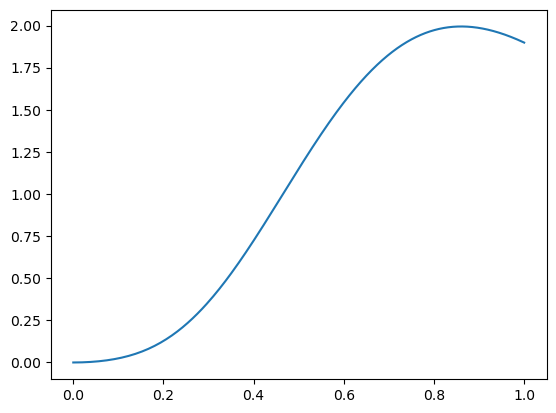

In [23]:
inte = []
for i in r:
    inte.append(integrando2(i))

#plt.plot(r, inte)
plt.plot(t, integrando)

Plotting density for orbital dergerg


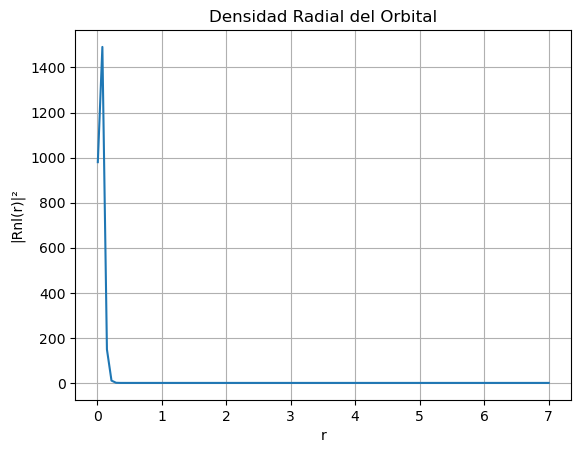

Plotting density for orbital dergerg
m = 0, l = 1


In [3]:
#constructing the wave function
import wave_function_constructor as wfc
wfc.plot_density(selected_orbital, False, "position")
wfc.plot_density(selected_orbital, True, "position")

0 3
1 5
2 3
3 6
4 78
5 8
6 3
7 2
8 24
9 6
10 4


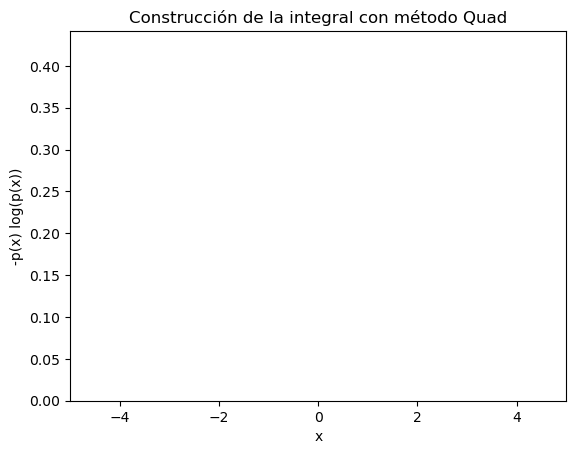

Entropía de Shannon de N(0,1): 1.4189385332046731


C:\Users\Ivan_lg\AppData\Local\Temp\ipykernel_20328\1430840556.py:13: RuntimeWarning: divide by zero encountered in log
  return np.where(p > 0, -p * np.log(p), 0)
C:\Users\Ivan_lg\AppData\Local\Temp\ipykernel_20328\1430840556.py:13: RuntimeWarning: invalid value encountered in scalar multiply
  return np.where(p > 0, -p * np.log(p), 0)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import quad

# Función de densidad normalizada para N(0,1)
def pdf(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

# Función entropía de Shannon: -p(x) * log(p(x))
def shannon_entropy_integrand(x):
    p = pdf(x)
    return np.where(p > 0, -p * np.log(p), 0)

# Puntos para la animación
x = np.linspace(-5, 5, 1000)
y = shannon_entropy_integrand(x)

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_xlim(-5, 5)
ax.set_ylim(0, np.max(y)*1.2)
ax.set_xlabel('x')
ax.set_ylabel('-p(x) log(p(x))')
ax.set_title('Construcción de la integral con método Quad')

# Inicialización
def init():
    line.set_data([], [])
    return line,

# Función de actualización
def animate(i):
    xi = x[:i]
    yi = y[:i]
    line.set_data(xi, yi)
    return line,

# Crear animación
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=len(x), interval=10, blit=True)

plt.show()

# Integramos la entropía de -inf a inf usando quad
entropy_quad, _ = quad(lambda x: shannon_entropy_integrand(x), -np.inf, np.inf)

print("Entropía de Shannon de N(0,1):", entropy_quad)


Entropía usando cambio de variable y trapecio: 1.8324114415885897
Entropía usando cambio de variable y Simpson manual: 1.832411441588587
Entropía usando quad directo: 1.8324114415885902


C:\Users\Ivan_lg\AppData\Local\Temp\ipykernel_11612\2175344427.py:41: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  shannonEntropy_quad, _ = quad(integrando_quad, 0, np.inf, limit=1000, epsrel=1e-14, epsabs=1e-14, limlst=1000)


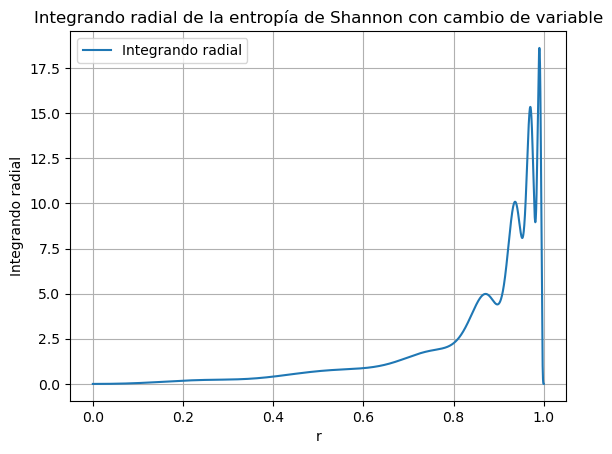

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import quad

atom1 = atoms_selected[100]  # Cambia esto por tu átomo real

# Malla de puntos en t (cambio de variable t = r / (1 + r))
t = np.linspace(1e-8, 1-1e-8, 100000)

# Cambio de variable inverso r = t / (1 - t)
r = t / (1 - t)

# Evaluar la densidad
rho = rho_monoparticular(r, atom1, "momentum", True, True)  # Cambia esto por tu función real

# Definir el integrando con cambio de variable
integrando = np.where(rho > 0, -4 * np.pi * r**2 * rho * np.log(rho) * (1 / (1 - t)**2), 0)

# Integrar manualmente usando la regla del trapecio
shannonEntropy_trapz = np.trapz(integrando, t)

# Integrar manualmente usando la regla de Simpson
def simpson_rule(y, x):
    if len(x) % 2 == 0:
        x = x[:-1]
        y = y[:-1]
    h = (x[-1] - x[0]) / (len(x) - 1)
    return (h/3) * (y[0] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-2:2]) + y[-1])

shannonEntropy_simps = simpson_rule(integrando, t)

# Definir función para integrar directamente con quad (sin cambio de variable)
def integrando_quad(r):
    rho_r = rho_monoparticular(r, atom1, "momentum", True, True)  # Cambia esto por tu función real
    if rho_r > 0:
        return -4 * np.pi * r**2 * rho_r * np.log(rho_r)
    else:
        return 0

shannonEntropy_quad, _ = quad(integrando_quad, 0, np.inf, limit=1000, epsrel=1e-14, epsabs=1e-14, limlst=1000)

# 

# Mostrar resultados
print("Entropía usando cambio de variable y trapecio:", shannonEntropy_trapz)
print("Entropía usando cambio de variable y Simpson manual:", shannonEntropy_simps)
print("Entropía usando quad directo:", shannonEntropy_quad)

# Graficar
plt.plot(t, np.where(rho > 0, -4 * np.pi * r**2 * rho * np.log(rho) * (1 / (1 - t)**2), 0), label="Integrando radial")
plt.xlabel("r")
plt.ylabel("Integrando radial")
plt.title("Integrando radial de la entropía de Shannon con cambio de variable")
plt.legend()
plt.grid()
plt.show()


Entropía usando cambio de variable y trapecio: 1.8324114415895967
Entropía usando cambio de variable y Simpson manual: 1.8324114413652357
Entropía usando quad directo: 1.8324114415896373
Entropía usando trapecio sin cambio de variable: 1.832179864070566
Entropía usando Simpson sin cambio de variable: 1.8321712743212946


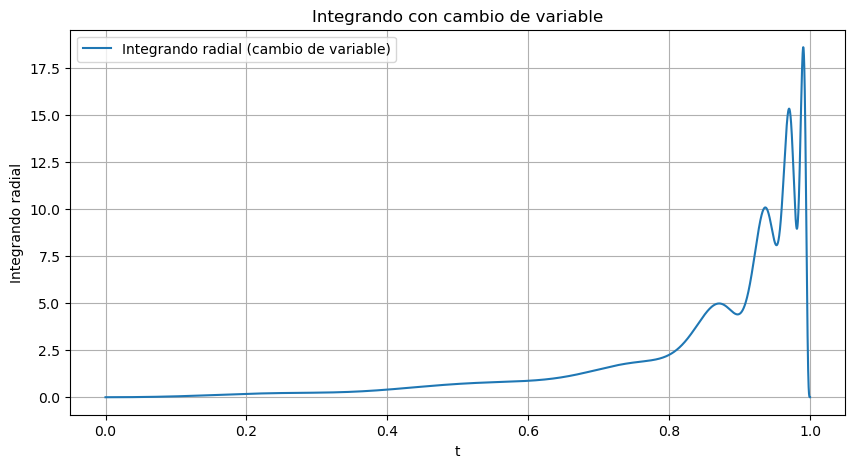

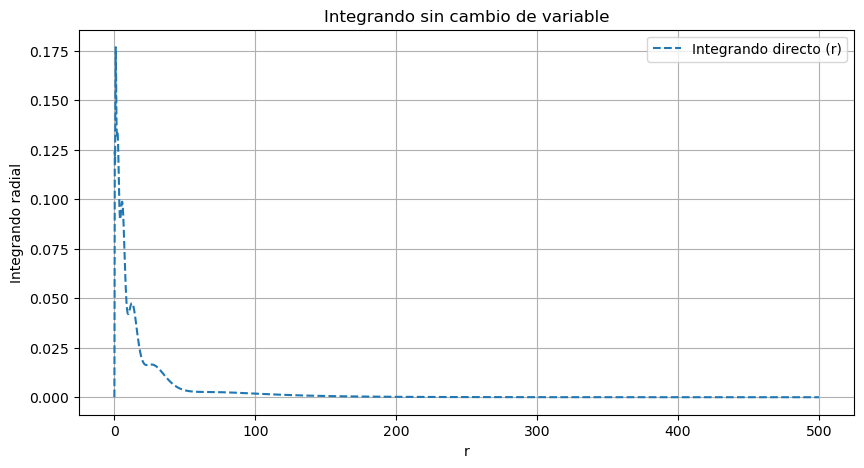

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import quad

atom1 = atoms_selected[100]  # Cambia esto por tu átomo real

# Malla de puntos en t (cambio de variable t = r / (1 + r))
t = np.linspace(1e-6, 1-1e-6, 10000)  # Ajustado para evitar extremos peligrosos y controlar memoria

# Cambio de variable inverso r = t / (1 - t)
r = t / (1 - t)

# Evaluar la densidad
rho = rho_monoparticular(r, atom1, "momentum", True, True)  # Cambia esto por tu función real

# Definir el integrando con cambio de variable
integrando_cv = np.where(rho > 0, -4 * np.pi * r**2 * rho * np.log(rho) * (1 / (1 - t)**2), 0)

# Integrar manualmente usando la regla del trapecio
shannonEntropy_trapz = np.trapz(integrando_cv, t)

# Integrar manualmente usando la regla de Simpson
def simpson_rule(y, x):
    if len(x) % 2 == 0:
        x = x[:-1]
        y = y[:-1]
    h = (x[-1] - x[0]) / (len(x) - 1)
    return (h/3) * (y[0] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-2:2]) + y[-1])

shannonEntropy_simps = simpson_rule(integrando_cv, t)

# Definir función para integrar directamente con quad (sin cambio de variable)
def integrando_quad(r):
    rho_r = rho_monoparticular(r, atom1, "momentum", True, True)
    if rho_r > 0:
        return -4 * np.pi * r**2 * rho_r * np.log(rho_r)
    else:
        return 0

shannonEntropy_quad, _ = quad(integrando_quad, 0, np.inf, limit=500, epsrel=1e-10, epsabs=1e-10, limlst=500)

# Comparar también sin cambio de variable
t_direct = np.linspace(1e-6, 500, 5000)
integrando_direct = []
for ti in t_direct:
    rho_direct = rho_monoparticular(ti, atom1, "momentum", True, True)
    integrando_direct.append(np.where(rho_direct > 0, -4 * np.pi * ti**2 * rho_direct * np.log(rho_direct), 0))

integrando_direct = np.array(integrando_direct)

shannonEntropy_trapz_direct = np.trapz(integrando_direct, t_direct)
shannonEntropy_simps_direct = simpson_rule(integrando_direct, t_direct)

# Mostrar resultados
print("Entropía usando cambio de variable y trapecio:", shannonEntropy_trapz)
print("Entropía usando cambio de variable y Simpson manual:", shannonEntropy_simps)
print("Entropía usando quad directo:", shannonEntropy_quad)
print("Entropía usando trapecio sin cambio de variable:", shannonEntropy_trapz_direct)
print("Entropía usando Simpson sin cambio de variable:", shannonEntropy_simps_direct)

# Graficar en dos figuras separadas
plt.figure(figsize=(10,5))
plt.plot(t, integrando_cv, label="Integrando radial (cambio de variable)")
plt.xlabel("t")
plt.ylabel("Integrando radial")
plt.title("Integrando con cambio de variable")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(t_direct, integrando_direct, '--', label="Integrando directo (r)")
plt.xlabel("r")
plt.ylabel("Integrando radial")
plt.title("Integrando sin cambio de variable")
plt.legend()
plt.grid()
plt.show()


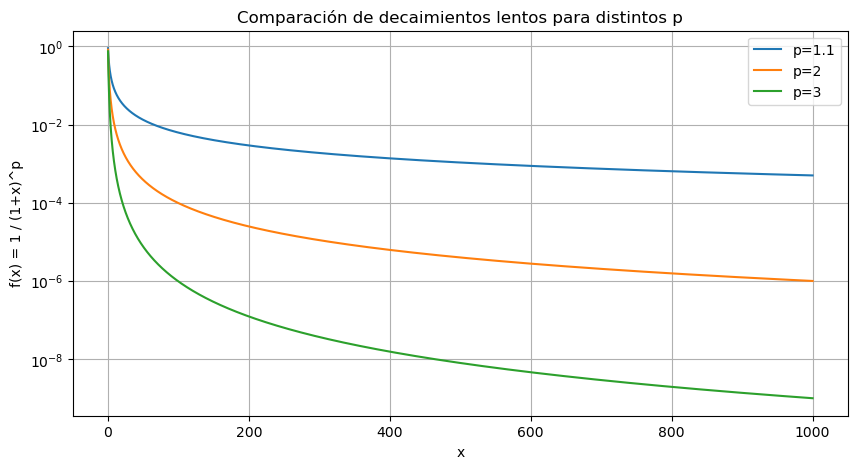

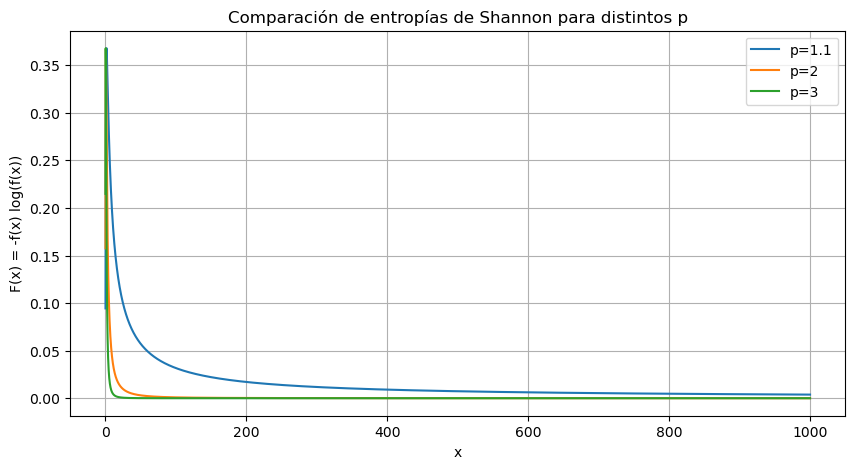

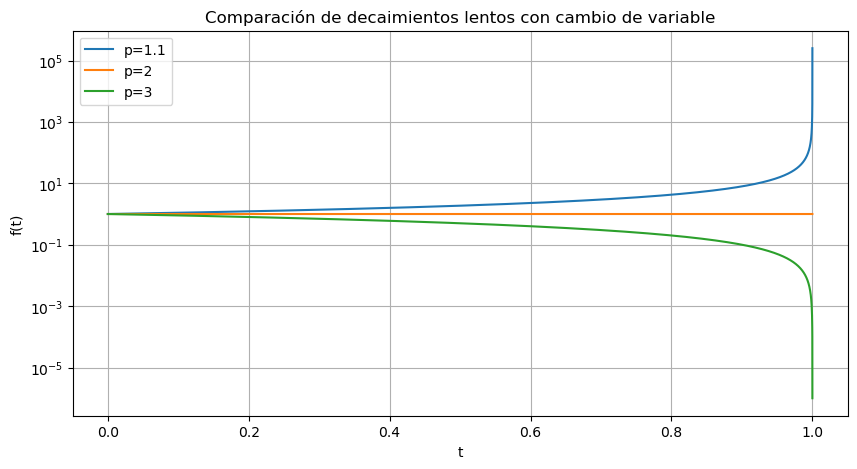

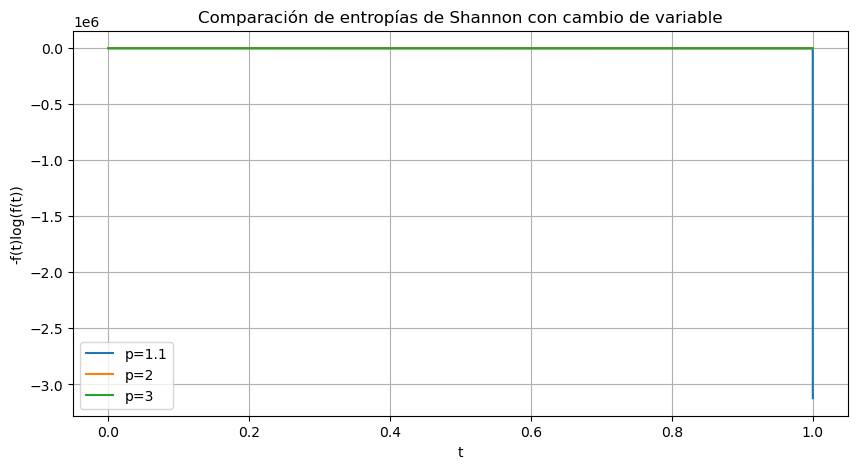

  p  Valor real  Trapz sin cambio  Trapz con cambio  Quad sin cambio  Quad con cambio  Fixed quad sin cambio  Fixed quad con cambio  Error Trapz sin cambio (%)  Error Trapz con cambio (%)  Error Quad sin cambio (%)  Error Quad con cambio (%)  Error Fixed quad sin cambio (%)  Error Fixed quad con cambio (%)
1.1        10.0          4.894521         18.800202             10.0             10.0               3.761006               4.474747                   51.054791                   88.002018               2.238210e-12               7.840791e-08                        62.389944                     5.525253e+01
2.0         1.0          0.909342          0.999998              1.0              1.0               0.192561               1.000000                    9.065796                    0.000200               0.000000e+00               0.000000e+00                        80.743900                     1.110223e-14
3.0         0.5          0.414926          0.499999              0.5        

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import quad, fixed_quad
import pandas as pd

# Definimos valores de p y mallas
p_values = [1.1, 2, 3]
x = np.linspace(0.1, 1000, 10000)
t = np.linspace(1e-6, 1-1e-6, 10000)
x2 = t / (1 - t)

# Graficar funciones f(x)
plt.figure(figsize=(10,5))
for p in p_values:
    f = 1 / (1 + x)**p
    plt.plot(x, f, label=f"p={p}")
plt.xlabel("x")
plt.ylabel("f(x) = 1 / (1+x)^p")
plt.title("Comparación de decaimientos lentos para distintos p")
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
for p in p_values:
    f = 1 / (1 + x)**p
    plt.plot(x, -f*np.log(f), label=f"p={p}")
plt.xlabel("x")
plt.ylabel("F(x) = -f(x) log(f(x))")
plt.title("Comparación de entropías de Shannon para distintos p")
plt.legend()
plt.grid()
plt.show()

# Graficar funciones f(t)
plt.figure(figsize=(10,5))
for p in p_values:
    f2 = (1 / (1 + x2)**p) * (1 / (1 - t)**2)
    plt.plot(t, f2, label=f"p={p}")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.title("Comparación de decaimientos lentos con cambio de variable")
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

# Graficar funciones f(t)
plt.figure(figsize=(10,5))
for p in p_values:
    f2 = (1 / (1 + x2)**p) * (1 / (1 - t)**2)
    plt.plot(t, -f2*np.log(f2), label=f"p={p}")
plt.xlabel("t")
plt.ylabel("-f(t)log(f(t))")
plt.title("Comparación de entropías de Shannon con cambio de variable")
plt.legend()
plt.grid()
plt.show()





# Inicializar listas para resultados
valor_real = []
integral_trapz_sin_cambio = []
integral_trapz_con_cambio = []
integral_quad_sin_cambio = []
integral_quad_con_cambio = []
integral_fixed_quad_sin_cambio = []
integral_fixed_quad_con_cambio = []

# Calcular integrales
for p in p_values:
    f = 1 / (1 + x)**p
    f2 = (1 / (1 + x2)**p) * (1 / (1 - t)**2)

    valor_real.append(1 / (p - 1))
    integral_trapz_sin_cambio.append(np.trapz(f, x))
    integral_trapz_con_cambio.append(np.trapz(f2, t))
    integral_quad_sin_cambio.append(quad(lambda x: 1 / (1 + x)**p, 0, np.inf)[0])
    integral_quad_con_cambio.append(quad(lambda t: (1 / (1 + t/(1-t))**p) * (1 / (1 - t)**2), 0, 1)[0])
    integral_fixed_quad_sin_cambio.append(fixed_quad(lambda x: 1 / (1 + x)**p, 0, 1000, n=10)[0])
    integral_fixed_quad_con_cambio.append(fixed_quad(lambda t: (1 / (1 + t/(1-t))**p) * (1 / (1 - t)**2), 0, 1, n=10)[0])

# Crear DataFrame con resultados y errores
df = pd.DataFrame({
    'p': p_values,
    'Valor real': valor_real,
    'Trapz sin cambio': integral_trapz_sin_cambio,
    'Trapz con cambio': integral_trapz_con_cambio,
    'Quad sin cambio': integral_quad_sin_cambio,
    'Quad con cambio': integral_quad_con_cambio,
    'Fixed quad sin cambio': integral_fixed_quad_sin_cambio,
    'Fixed quad con cambio': integral_fixed_quad_con_cambio
})

# Calcular errores relativos (%)
for col in df.columns[2:]:
    df[f'Error {col} (%)'] = 100 * np.abs(df[col] - df['Valor real']) / df['Valor real']

# Mostrar tabla
print(df.to_string(index=False))



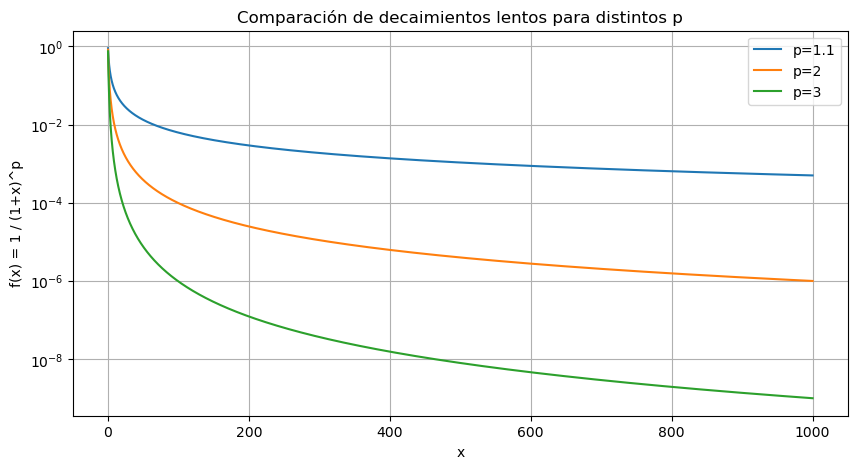

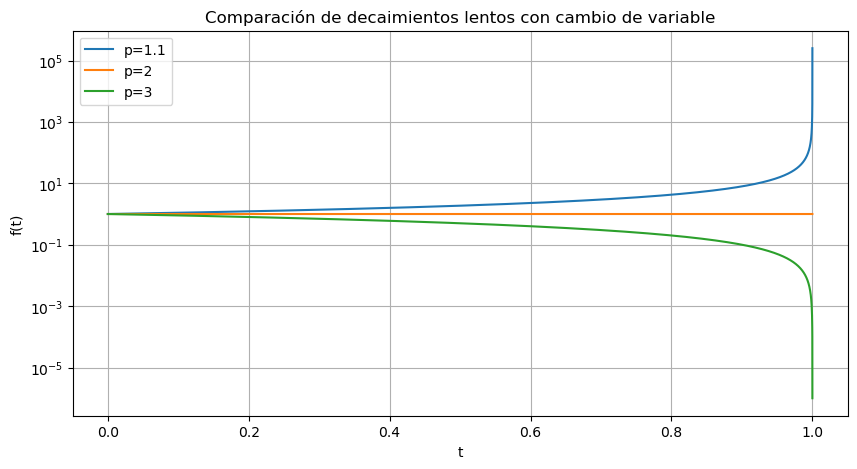

  p  Valor real  Trapz sin cambio  Trapz con cambio  Quad sin cambio  Quad con cambio  Fixed quad sin cambio  Fixed quad con cambio  Error Trapz sin cambio (%)  Error Trapz con cambio (%)  Error Quad sin cambio (%)  Error Quad con cambio (%)  Error Fixed quad sin cambio (%)  Error Fixed quad con cambio (%)
1.1        10.0          4.894521         18.800202             10.0             10.0               3.761006               4.474747                   51.054791                   88.002018               2.238210e-12               7.840791e-08                        62.389944                     5.525253e+01
2.0         1.0          0.909342          0.999998              1.0              1.0               0.192561               1.000000                    9.065796                    0.000200               0.000000e+00               0.000000e+00                        80.743900                     1.110223e-14
3.0         0.5          0.414926          0.499999              0.5        

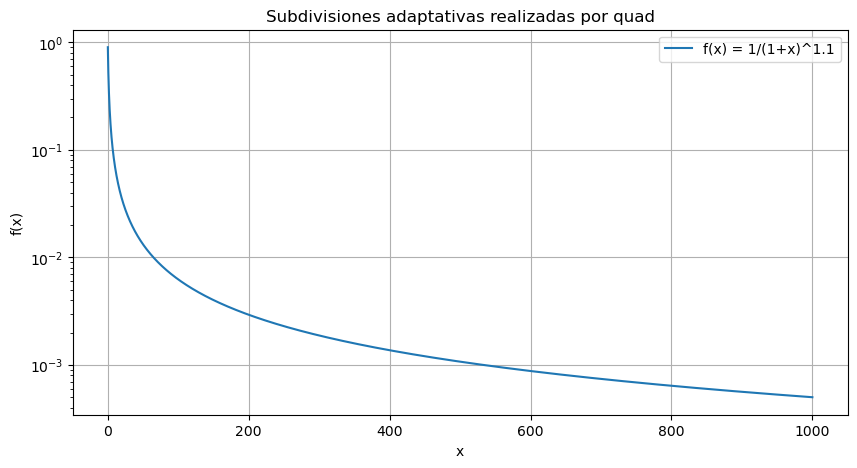

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import quad, fixed_quad
import pandas as pd

# Definimos valores de p y mallas
p_values = [1.1, 2, 3]
x = np.linspace(0.1, 1000, 10000)
t = np.linspace(1e-6, 1-1e-6, 10000)
x2 = t / (1 - t)

# Graficar funciones f(x)
plt.figure(figsize=(10,5))
for p in p_values:
    f = 1 / (1 + x)**p
    plt.plot(x, f, label=f"p={p}")
plt.xlabel("x")
plt.ylabel("f(x) = 1 / (1+x)^p")
plt.title("Comparación de decaimientos lentos para distintos p")
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

# Graficar funciones f(t)
plt.figure(figsize=(10,5))
for p in p_values:
    f2 = (1 / (1 + x2)**p) * (1 / (1 - t)**2)
    plt.plot(t, f2, label=f"p={p}")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.title("Comparación de decaimientos lentos con cambio de variable")
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

# Inicializar listas para resultados
valor_real = []
integral_trapz_sin_cambio = []
integral_trapz_con_cambio = []
integral_quad_sin_cambio = []
integral_quad_con_cambio = []
integral_fixed_quad_sin_cambio = []
integral_fixed_quad_con_cambio = []

# Calcular integrales
for p in p_values:
    f = 1 / (1 + x)**p
    f2 = (1 / (1 + x2)**p) * (1 / (1 - t)**2)

    valor_real.append(1 / (p - 1))
    integral_trapz_sin_cambio.append(np.trapz(f, x))
    integral_trapz_con_cambio.append(np.trapz(f2, t))
    integral_quad_sin_cambio.append(quad(lambda x: 1 / (1 + x)**p, 0, np.inf)[0])
    integral_quad_con_cambio.append(quad(lambda t: (1 / (1 + t/(1-t))**p) * (1 / (1 - t)**2), 0, 1)[0])
    integral_fixed_quad_sin_cambio.append(fixed_quad(lambda x: 1 / (1 + x)**p, 0, 1000, n=10)[0])
    integral_fixed_quad_con_cambio.append(fixed_quad(lambda t: (1 / (1 + t/(1-t))**p) * (1 / (1 - t)**2), 0, 1, n=10)[0])

# Crear DataFrame con resultados y errores
df = pd.DataFrame({
    'p': p_values,
    'Valor real': valor_real,
    'Trapz sin cambio': integral_trapz_sin_cambio,
    'Trapz con cambio': integral_trapz_con_cambio,
    'Quad sin cambio': integral_quad_sin_cambio,
    'Quad con cambio': integral_quad_con_cambio,
    'Fixed quad sin cambio': integral_fixed_quad_sin_cambio,
    'Fixed quad con cambio': integral_fixed_quad_con_cambio
})

# Calcular errores relativos (%)
for col in df.columns[2:]:
    df[f'Error {col} (%)'] = 100 * np.abs(df[col] - df['Valor real']) / df['Valor real']

# Mostrar tabla
print(df.to_string(index=False))

# Visualizar cómo quad subdivide adaptativamente un ejemplo complicado
f_example = lambda x: 1 / (1 + x)**1.1

subdivisiones = []

# Función para contar subdivisiones
def callback(xk):
    subdivisiones.append(xk)

# Llamar quad con callback para registrar subdivisiones
quad(f_example, 0, np.inf, full_output=1, epsabs=1e-10, epsrel=1e-10)

# Graficar las subdivisiones
subdivisiones = np.sort(np.unique(subdivisiones))
plt.figure(figsize=(10,5))
plt.plot(x, 1/(1+x)**1.1, label="f(x) = 1/(1+x)^1.1")
for xi in subdivisiones:
    plt.axvline(x=xi, color='red', linestyle='--', alpha=0.5)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Subdivisiones adaptativas realizadas por quad")
plt.legend()
plt.grid()
plt.yscale('log')
plt.show()


Intervalos evaluados: [(0.0, 1), (0.0, 0.5), (0.5, 1), (0.5, 0.75), (0.75, 1), (0.75, 0.875), (0.875, 1), (0.875, 0.9375), (0.9375, 1), (0.9375, 0.96875), (0.96875, 1), (0.96875, 0.984375), (0.984375, 1), (0.984375, 0.9921875), (0.9921875, 1), (0.9921875, 0.99609375), (0.99609375, 1), (0.99609375, 0.998046875), (0.998046875, 1), (0.998046875, 0.9990234375), (0.9990234375, 1), (0.9990234375, 0.99951171875), (0.99951171875, 1), (0.99951171875, 0.999755859375), (0.999755859375, 1), (0.999755859375, 0.9998779296875), (0.9998779296875, 1), (0.999755859375, 0.99981689453125), (0.99981689453125, 0.9998779296875), (0.99981689453125, 0.999847412109375), (0.999847412109375, 0.9998779296875), (0.999847412109375, 0.9998626708984375), (0.9998626708984375, 0.9998779296875), (0.9998779296875, 0.99993896484375), (0.99993896484375, 1), (0.9998779296875, 0.999908447265625), (0.999908447265625, 0.99993896484375), (0.9998779296875, 0.9998931884765625), (0.9998931884765625, 0.999908447265625), (0.999877929

C:\Users\Ivan_lg\AppData\Local\Temp\ipykernel_31384\899649069.py:161: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  print("Resultado funcion quad: ", quad(lambda x: test_func2(x, a, b)+test_func2(x, 2, 0.1), 0, np.inf, epsabs=1.49e-20, epsrel=1.49e-20, limit = 10000, limlst= 100000000))
C:\Users\Ivan_lg\AppData\Local\Temp\ipykernel_31384\899649069.py:175: RuntimeWarning: divide by zero encountered in divide
  x_mapped = t / (1 - t)
C:\Users\Ivan_lg\AppData\Local\Temp\ipykernel_31384\899649069.py:154: RuntimeWarning: invalid value encountered in multiply
  return ((b**(1+a)/sp.gamma(1+a)))*np.exp(-x*b) * x**a


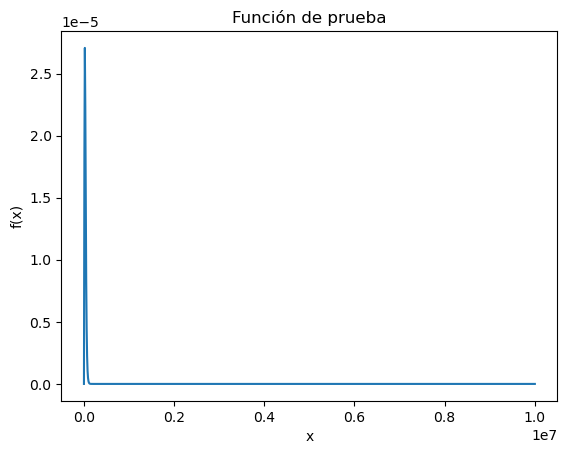

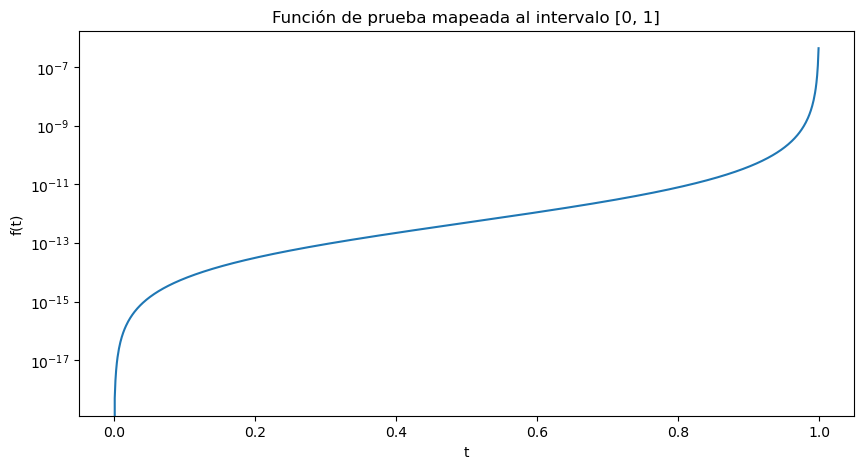

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import scipy.special as sp
from scipy.integrate import quad

# Valores para cuadratura de Gauss-Kronrod 10-21 puntos (G10-K21) oficiales
xgauss = np.array([
    -9.739065285171717200779640120844521e-01,
    -8.650633666889845107320966884234930e-01,
    -6.794095682990244062343273651148736e-01,
    -4.333953941292471907992659431657842e-01,
    -1.488743389816312108848260011297200e-01,
     1.488743389816312108848260011297200e-01,
     4.333953941292471907992659431657842e-01,
     6.794095682990244062343273651148736e-01,
     8.650633666889845107320966884234930e-01,
     9.739065285171717200779640120844521e-01
])

wgauss = np.array([
    6.667134430868813759356880989333179e-02,
    1.494513491505805931457763396576973e-01,
    2.190863625159820439955349342281632e-01,
    2.692667193099963550912269215694694e-01,
    2.955242247147528701738929946513383e-01,
    2.955242247147528701738929946513383e-01,
    2.692667193099963550912269215694694e-01,
    2.190863625159820439955349342281632e-01,
    1.494513491505805931457763396576973e-01,
    6.667134430868813759356880989333179e-02
])

xkronrod = np.array([
    -9.956571630258080807355272806890028e-01,
    -9.739065285171717200779640120844521e-01,
    -9.301574913557082260012071800595083e-01,
    -8.650633666889845107320966884234930e-01,
    -7.808177265864168970637175783450424e-01,
    -6.794095682990244062343273651148736e-01,
    -5.627571346686046833390000992726941e-01,
    -4.333953941292471907992659431657842e-01,
    -2.943928627014601981311266031038656e-01,
    -1.488743389816312108848260011297200e-01,
     0.000000000000000000000000000000000e+00,
     1.488743389816312108848260011297200e-01,
     2.943928627014601981311266031038656e-01,
     4.333953941292471907992659431657842e-01,
     5.627571346686046833390000992726941e-01,
     6.794095682990244062343273651148736e-01,
     7.808177265864168970637175783450424e-01,
     8.650633666889845107320966884234930e-01,
     9.301574913557082260012071800595083e-01,
     9.739065285171717200779640120844521e-01,
     9.956571630258080807355272806890028e-01
])

wkronrod = np.array([
    1.169463886737187427806439606219205e-02,
    3.255816230796472747881897245938976e-02,
    5.475589657435199603138130024458018e-02,
    7.503967481091995276704314091619001e-02,
    9.312545458369760553506546508336634e-02,
    1.093871588022976418992105903258050e-01,
    1.234919762620658510779581098310742e-01,
    1.347092173114733259280540017717068e-01,
    1.427759385770600807970942731387171e-01,
    1.477391049013384913748415159720680e-01,
    1.494455540029169056649364683898212e-01,
    1.477391049013384913748415159720680e-01,
    1.427759385770600807970942731387171e-01,
    1.347092173114733259280540017717068e-01,
    1.234919762620658510779581098310742e-01,
    1.093871588022976418992105903258050e-01,
    9.312545458369760553506546508336634e-02,
    7.503967481091995276704314091619001e-02,
    5.475589657435199603138130024458018e-02,
    3.255816230796472747881897245938976e-02,
    1.169463886737187427806439606219205e-02
])

def gauss_kronrod(f, a, b):
    mid = 0.5 * (a + b)
    half_length = 0.5 * (b - a)

    nodes = mid + half_length * xkronrod
    f_nodes = f(nodes)
    integral = half_length * np.sum(wkronrod * f_nodes)

    nodes_gauss = mid + half_length * xgauss
    f_nodes_gauss = f(nodes_gauss)
    integral_gauss = half_length * np.sum(wgauss * f_nodes_gauss)

    error_estimate = np.abs(integral - integral_gauss)

    return integral, error_estimate

def adaptive_integrate(f, a, b, epsabs=1e-15, epsrel=1e-15, limit=10000, record_intervals=True):
    if np.isinf(a) or np.isinf(b):
        if np.isinf(a) and not np.isinf(b):
            g = lambda t: f(t/(1-t)) * (1 / (1-t)**2)
            return adaptive_integrate(g, 0.0, 1 , epsabs, epsrel, limit)
        elif not np.isinf(a) and np.isinf(b):
            g = lambda t: f(t/(1-t)) * (1 / (1-t)**2)
            return adaptive_integrate(g, 0.0, 1 , epsabs, epsrel, limit)
        else:
            raise ValueError("Cannot integrate from -inf to +inf with this mapping.")

    stack = [(a, b)]
    total = 0.0
    iterations = 0
    
    intervals = [(a, b)]  # Para almacenar los intervalos evaluados
    while stack:
        iterations += 1
        if iterations > limit:
            warnings.warn("Too many iterations, adding last evaluated interval.")
            a1, b1 = stack.pop()
            integral, _ = gauss_kronrod(f, a1, b1)
            total += integral
            break

        a1, b1 = stack.pop()
        if a1 == b1:
            continue

        integral, error = gauss_kronrod(f, a1, b1)
        tolerance = max(epsabs, epsrel * np.abs(integral))

        if np.isnan(error) or np.isnan(integral):
            continue

        if error < tolerance:
            total += integral
        else:
            mid = 0.5 * (a1 + b1)
            stack.append((mid, b1))
            stack.append((a1, mid))
            if record_intervals:
                intervals.append((a1, mid))
                intervals.append((mid, b1))

    if record_intervals:
        print("Intervalos evaluados:", intervals)
        print("Número de intervalos:", len(intervals))
        print("Número de iteraciones:", iterations)
        return total, intervals
    else:
        return total

# Ejemplo de uso:
if __name__ == "__main__":
    def test_func2(x, a, b):    
        return ((b**(1+a)/sp.gamma(1+a)))*np.exp(-x*b) * x**a 

    p = 1.01
    b = 0.0001
    a = 2
    result2 = adaptive_integrate(lambda x: test_func2(x, a, b), 0, np.inf, record_intervals=True)
    print("Resultado para test_func2:", result2[0])
    print("Resultado funcion quad: ", quad(lambda x: test_func2(x, a, b)+test_func2(x, 2, 0.1
                                                                                    
                                                                                    
                                                                                    
                                                                                    
                                                                                    
                                                                                    ), 0, np.inf, epsabs=1.49e-20, epsrel=1.49e-20, limit = 10000, limlst= 100000000))
    print("Valor real (aproximado):", 1)

    #Graficar la función de prueba
    x_vals = np.linspace(0, 10000000, 1000)
    y_vals = test_func2(x_vals, a, b)
    plt.plot(x_vals, y_vals, label='f(x) = exp(-bx) * x^a')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Función de prueba')

    
    #Graficar la función de prueba mapeada al intervalo [0, 1]
    t = np.linspace(0, 1, 1000)
    x_mapped = t / (1 - t)
    #print("Resultado funcion quad mapeada: ", quad(lambda t: test_func2(t/(1-t), a, b)*(1/(1-t)**2), 0, 1, epsabs=1.49e-20, epsrel=1.49e-20, limit = 10000, limlst= 10000))
    y_mapped = test_func2(x_mapped, a, b) 
    plt.figure(figsize=(10, 5))
    plt.plot(t, y_mapped, label='f(t) = exp(-bt/(1-t)) * (t/(1-t))^a')
    plt.yscale('log')
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.title('Función de prueba mapeada al intervalo [0, 1]')



Resultado para test_func2: 0.968373243979328
Valor real (aproximado): 1


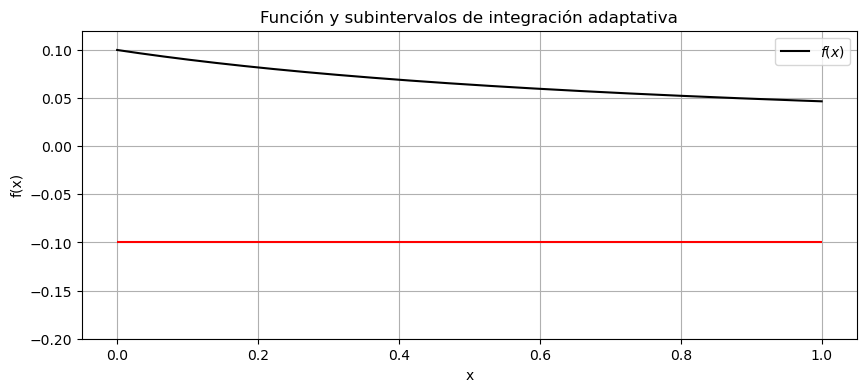

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Valores para cuadratura de Gauss-Kronrod 10-21 puntos (G10-K21) oficiales
xgauss = np.array([
    -0.9739065285171717, -0.8650633666889845, -0.6794095682990244,
    -0.4333953941292472, -0.1488743389816312,
     0.1488743389816312,  0.4333953941292472,  0.6794095682990244,
     0.8650633666889845,  0.9739065285171717
])

wgauss = np.array([
    0.0666713443086881, 0.1494513491505806, 0.2190863625159820,
    0.2692667193099963, 0.2955242247147529,
    0.2955242247147529, 0.2692667193099963, 0.2190863625159820,
    0.1494513491505806, 0.0666713443086881
])

xkronrod = np.array([
    -0.9956571630258081, -0.9739065285171717, -0.9301574913557082,
    -0.8650633666889845, -0.7808177265864169, -0.6794095682990244,
    -0.5627571346686047, -0.4333953941292472, -0.2943928627014602,
    -0.1488743389816312,  0.0000000000000000,
     0.1488743389816312,  0.2943928627014602,  0.4333953941292472,
     0.5627571346686047,  0.6794095682990244,  0.7808177265864169,
     0.8650633666889845,  0.9301574913557082,  0.9739065285171717,
     0.9956571630258081
])

wkronrod = np.array([
    0.0116946388673719, 0.0325581623079647, 0.0547558965743519,
    0.0750396748109199, 0.0931254545836976, 0.1093871588022976,
    0.1234919762620659, 0.1347092173114733, 0.1427759385770601,
    0.1477391049013385, 0.1494455540029169,
    0.1477391049013385, 0.1427759385770601, 0.1347092173114733,
    0.1234919762620659, 0.1093871588022976, 0.0931254545836976,
    0.0750396748109199, 0.0547558965743519, 0.0325581623079647,
    0.0116946388673719
])

def gauss_kronrod(f, a, b):
    mid = 0.5 * (a + b)
    half_length = 0.5 * (b - a)

    nodes = mid + half_length * xkronrod
    f_nodes = f(nodes)
    integral = half_length * np.sum(wkronrod * f_nodes)

    nodes_gauss = mid + half_length * xgauss
    f_nodes_gauss = f(nodes_gauss)
    integral_gauss = half_length * np.sum(wgauss * f_nodes_gauss)

    error_estimate = np.abs(integral - integral_gauss)

    return integral, error_estimate

def adaptive_integrate(f, a, b, epsabs=1e-8, epsrel=1e-8, limit=10000, record_intervals=False):
    if np.isinf(a) or np.isinf(b):
        if np.isinf(a) and not np.isinf(b):
            g = lambda t: f( t/(1 - t) ) * (1 / (1-t)**2)
            return adaptive_integrate(g, 0.0, 1.0, epsabs, epsrel, limit, record_intervals)
        elif not np.isinf(a) and np.isinf(b):
            g = lambda t: f( t/(1 - t) ) * (1 / (1-t)**2)
            return adaptive_integrate(g, 0.0, 1.0-1.0e-15, epsabs, epsrel, limit, record_intervals)
        else:
            raise ValueError("Cannot integrate from -inf to +inf with this mapping.")

    stack = [(a, b)]
    total = 0.0
    iterations = 0
    intervals = []

    while stack:
        iterations += 1
        if iterations > limit:
            warnings.warn("Too many iterations, adding last evaluated interval.")
            a1, b1 = stack.pop()
            integral, _ = gauss_kronrod(f, a1, b1)
            total += integral
            break

        a1, b1 = stack.pop()
        if a1 == b1:
            continue

        integral, error = gauss_kronrod(f, a1, b1)
        tolerance = max(epsabs, epsrel * np.abs(integral))

        if np.isnan(error) or np.isnan(integral):
            continue

        if error < tolerance:
            total += integral
            if record_intervals:
                intervals.append((a1, b1))
        else:
            mid = 0.5 * (a1 + b1)
            stack.append((mid, b1))
            stack.append((a1, mid))

    if record_intervals:
        return total, intervals
    return total

# Ejemplo de uso:
if __name__ == "__main__":
    def test_func2(x, p=1.1):
         return (p-1)/(1+x)**p

    result2, intervals = adaptive_integrate(lambda x: test_func2(x, p=1.1), 0, np.inf, record_intervals=True)
    print("Resultado para test_func2:", result2)
    print("Valor real (aproximado):", 1)

    # Graficar nodos y subintervalos
    x = np.linspace(0, 1, 500)
    y = test_func2(x)

    plt.figure(figsize=(10, 4))
    plt.plot(x, y, label=r"$f(x)$", color='black')
    for a, b in intervals:
        plt.hlines(y=-0.1, xmin=a, xmax=b, color='red')
    plt.ylim([-0.2, np.nanmax(y)*1.2])
    plt.title('Función y subintervalos de integración adaptativa')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.legend()
    plt.show()
